**Code for understanding this file:**
- <font color=blue>Questions are put in blue <font color=black> 
- Answers are put in black

Before starting these exercises we have imported some libraries:

In [340]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Visual story telling part 2: Capital Metro data


<font color=blue>
Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.
<br>
    
You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

To start I am going to view my data and make some additional columns and changes. This is not part of the visualization/stories.

In [652]:
#Reading the file and viewing the first few rows:
metro = pd.read_csv('capmetro_UT.csv')
metro[:2]

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend


After looking at this data I want to separate the timestamp with date and time in different columns.

*I will keep the timestamp column in case I need it later down the line.*

In [654]:
metro['timestamp'] = pd.to_datetime(metro['timestamp'])
metro['date'] = metro['timestamp'].dt.date
metro['time'] = metro['timestamp'].dt.time
metro['minutes'] = metro['timestamp'].dt.minute
metro[:2]

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend,date,time,minutes
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend,2018-09-01,06:00:00,0
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend,2018-09-01,06:15:00,15


I also want to rename the weekend column to weekend_weekday as it is confusing right now naming the column as one of the response answers.

In [655]:
metro.rename(columns={'weekend': 'weekend_weekday'}, inplace=True)

I want to see the difference between people getting on and off the metro as this may be useful. Below I have added another column, 'board_alight_difference', which is just boarding minus alighting. Positive values mean more people boarded the metro than got off, vice versa for negative. A 0 value means the same number of people got on/off.

In [656]:
metro['board_alight_difference'] = metro['boarding'] - metro['alighting']
metro[:2]

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend_weekday,date,time,minutes,board_alight_difference
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend,2018-09-01,06:00:00,0,-1
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend,2018-09-01,06:15:00,15,1


Next I am just going to look at a summary statistics table to get a better idea of what I am looking at:
- The SD for both boarding and alighting is fairly high, meaning there are heavy fluctuations in who is getting on and off each day
- The temperature range is very drastic, with temperatures dropping to 29F, so this is something I want to look at
- The max. hour is 9 and the min. hour is 6 so I assume the metro hours of operation are 6am-10pm


In [657]:
metro.describe()

,boarding,alighting,temperature,hour_of_day,minutes,board_alight_difference
count,5824.000000,5824.000000,5824.000000,5824.000000,5824.00000,5824.000000
mean,51.511676,47.646291,69.282473,13.500000,22.50000,3.865385
std,48.820284,50.069866,13.540249,4.610168,16.77195,65.594585
min,0.000000,0.000000,29.180000,6.000000,0.00000,-278.000000
25%,13.000000,13.000000,59.195000,9.750000,11.25000,-13.000000
50%,33.000000,28.000000,72.750000,13.500000,22.50000,3.000000
75%,79.250000,64.000000,79.290000,17.250000,33.75000,42.000000
max,288.000000,304.000000,97.640000,21.000000,45.00000,221.000000


## Visual Story Telling, First Story: 

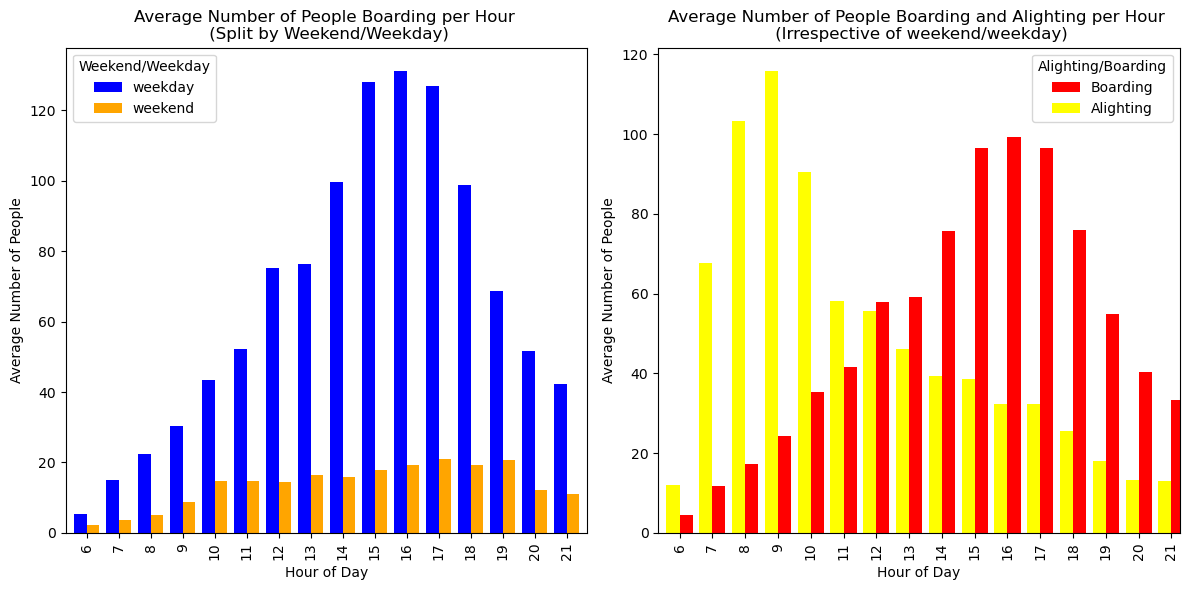

In [679]:
#Plot 1:
grouped_boarding = metro.groupby(['hour_of_day', 'weekend_weekday'])['boarding'].mean()
colors = {'weekend': 'orange', 'weekday': 'blue'}

#Creating a line of code that puts my plots side by side:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  

#Subplot 1:
grouped_boarding.unstack('weekend_weekday').plot(kind='bar', width=0.8, color=colors, ax=ax[0])
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Average Number of People')
ax[0].set_title('Average Number of People Boarding per Hour \n (Split by Weekend/Weekday)')
ax[0].legend(title='Weekend/Weekday')

# Plot 2 - Average Number of People Boarding and Alighting per Hour
grouped_boarding = metro.groupby(['hour_of_day'])['boarding'].mean()
grouped_alighting = metro.groupby(['hour_of_day'])['alighting'].mean()

grouped_boarding.plot(kind='bar', width=0.4, color='red', position=0, label='Boarding', ax=ax[1])
grouped_alighting.plot(kind='bar', width=0.4, color='yellow', position=1, label='Alighting', ax=ax[1])
ax[1].set_xlabel('Hour of Day')
ax[1].set_ylabel('Average Number of People')
ax[1].set_title('Average Number of People Boarding and Alighting per Hour \n (Irrespective of weekend/weekday)')
ax[1].legend(title='Alighting/Boarding')


tight_layout()
show()


**Visual Story 1: Do People Really Work a 9-5 job?**
<br>
It is no secret that Austin is difficult city to drive through, with expensive parking costs! With this in mind, I wanted to see if the Metro bus is essential to commuters, going to College or working at the UT Campus. While the data does not reveal the type of people using the Metro Bus service explicity, I feel as though it is safe to assume that most of these users are commuters for work/college. With that, I ask the question of whether these people are actually commuters, and if they are working/studying during the typical 9am-5pm time frame. 

In order to find this out I have created two bar charts:

**Bar Chart 1** looks at the number of people boarding (i.e. leaving campus) the Metro per hour, but splits the data into weekdays and weekends. The trend shows us that the usage on weekends does not fluctate like it does during the week. In fact, on weekends, usage remains at a very low level from the hours of 10am-7pm. Any hours outside of this on the weekend are virtually non existent. On the other hand, the boarding levels for a week day center around 3-5pm, revealing that most people are leaving campus around this time. This chart cements my assumption of commuters, with most workers/students not working/in school on the weekends.


**Bar Chart 2** looks at the number of people boarding and alighting, on average, every hour of the day. Since the previous bar chart showed no severe fluctuations in the weekend data I have applied the boarding/alighting mean hourly values to the whole data set, irrespective of the day. This bar chart shows us that most people are using the Metro and getting off on campus at around 8-10am, and most leave around 3-5pm. Of course, we do not know for sure if the individuals who are alighting in the peak alighting times are the same individuals who are boarding during the peak boarding times. Notwithstanding, is does seem safe to create the story that people truly are working a 9-5 (or at least a 9-4)!

*For the purpose of this paper students are considered to be working. 

In [676]:
#Creating a new subset for my next story:
weekday_subset = metro[metro['weekend_weekday'] == 'weekday']
weekday_subset[:3]

dated_weekday = weekday_subset.groupby(['date'])['boarding', 'alighting'].agg('mean')
dated_weekday[:2]


dated_weekday.reset_index(inplace=True)
dated_weekday.index.name = 'New Index'
dated_weekday[:3]

,date,boarding,alighting
New Index,,,
0,2018-09-03,12.281250,11.750000
1,2018-09-04,76.296875,71.484375
2,2018-09-05,76.812500,70.734375


## Visual Story Telling, Second Story: 

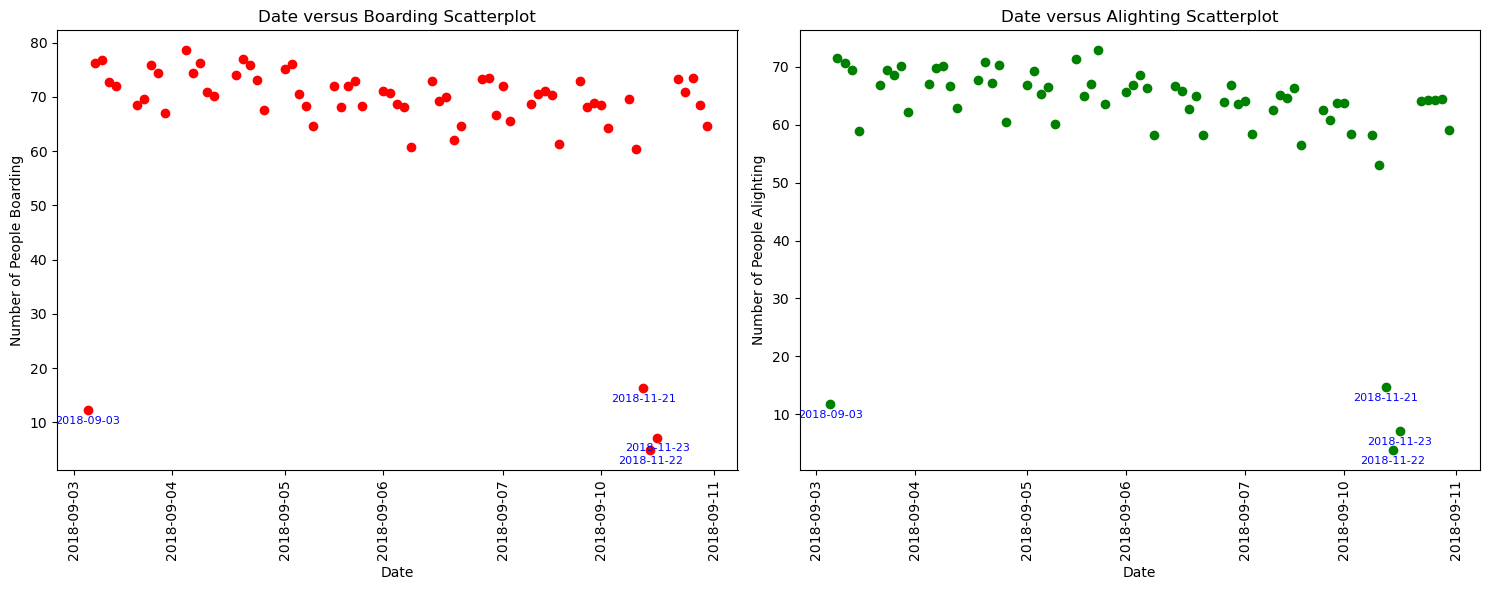

In [674]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#First subplot:
axs[0].scatter(dated_weekday['date'], dated_weekday['boarding'], marker='o', color='red', label='Boarding', linestyle='None')

axs[0].set_xlabel("Date")
axs[0].set_ylabel("Number of People Boarding")
axs[0].set_title("Date versus Boarding Scatterplot")

#Rotate the x-axis labels
axs[0].set_xticklabels(dated_weekday['date'], rotation=90, ha='center')

#Label outlier points:
for date, boarding in zip(dated_weekday['date'], dated_weekday['boarding']):
    if boarding < 30:
        axs[0].annotate(f"{date}", xy=(date, boarding), xytext=(0, -10), textcoords='offset points', ha='center', color='blue', fontsize=8)

#Second: Number of People Alighting
axs[1].scatter(dated_weekday['date'], dated_weekday['alighting'], marker='o', color='green', label='Alighting', linestyle='None')

axs[1].set_xlabel("Date")
axs[1].set_ylabel("Number of People Alighting")
axs[1].set_title("Date versus Alighting Scatterplot")

#Rotate the x-axis labels
axs[1].set_xticklabels(dated_weekday['date'], rotation=90, ha='center')

#Label outlier points:
for date, alighting in zip(dated_weekday['date'], dated_weekday['alighting']):
    if alighting < 30:
        axs[1].annotate(f"{date}", xy=(date, alighting), xytext=(0, -10), textcoords='offset points', ha='center', color='blue', fontsize=8)

plt.tight_layout()
plt.show()


**Visual Story 2: Do National Holidays Really Affect Campus?**
<br>
Something I noticed about our cohort is how many international students there are! With that in mind I wanted to see if National, U.S. Holidays drastically affect the Metro ridership. With Sept/Oct/Nov in our data set, Thanksgiving is included, and yet this is a holiday that many UT Students do not celebrate (since it is an American Holiday).

In order to see if holidays do affect campus, despite a large international student body, I have created 2 scatterplots. These scatterplots look at the weekday ridership (since the National Holidays in 2018 fell on weekdays, and ridership on weekends were too low) by dates, and plots the mean boarding and alighting levels. I have implemented another layer in the code that gives the specific dates of points that are obvious outliers. 

The dates for both boarding and alighting match! Moreover, these dates are National Holidays! 09/03/2018 was Labor Day, and 11/21/2018-11/23/2018 was the Thanksgiving break. So, while our UT does have many international students, they, along with everyone else, are taking advantage of the holidays and avoiding going into campus! *(Though the Metro may have been out of service on the actual Thanksgiving Day...)*